In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn


In [2]:
hs=pd.read_csv("houses.csv")

In [3]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        490 non-null    float64
 1   ZN          490 non-null    float64
 2   INDUS       490 non-null    float64
 3   CHAS        490 non-null    int64  
 4   NOX         490 non-null    float64
 5   RM          488 non-null    float64
 6   AGE         490 non-null    float64
 7   DIS         490 non-null    float64
 8   RAD         490 non-null    int64  
 9   TAX         490 non-null    int64  
 10  PRATIO      490 non-null    float64
 11  B           490 non-null    float64
 12  LSTAT       490 non-null    float64
 13  MEDV        490 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 53.7 KB


In [4]:
print(hs.columns.tolist())

['CRIM     ', 'ZN        ', 'INDUS     ', 'CHAS      ', 'NOX       ', 'RM      ', 'AGE', 'DIS       ', 'RAD      ', 'TAX  ', 'PRATIO', 'B        ', 'LSTAT    ', 'MEDV     ']


In [5]:
hs.columns = hs.columns.str.strip()

In [6]:
print(hs.columns.tolist())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'MEDV']


In [7]:
hs['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
485    0
486    0
487    0
488    0
489    0
Name: CHAS, Length: 490, dtype: int64

In [8]:
hs['CHAS'].value_counts()

0    455
1     35
Name: CHAS, dtype: int64

In [9]:
#hs.hist(bins = 50,figsize=(30,15))    for plotting histogram

In [10]:
#for learning purpose and same function presnt in sklearn
def split_train_test(data,train_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*train_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#train_set,test_set = split_train_test(hs,0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(hs,test_size=0.2,random_state=42)
print("train_set:",len(train_set),"\n","test_set:",len(test_set))

train_set: 392 
 test_set: 98


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)
for train_index ,test_index in split.split(hs,hs['CHAS']):
    strat_train_set = hs.loc[train_index]
    strat_test_set = hs.loc[test_index]

In [14]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 284 to 58
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    98 non-null     float64
 1   ZN      98 non-null     float64
 2   INDUS   98 non-null     float64
 3   CHAS    98 non-null     int64  
 4   NOX     98 non-null     float64
 5   RM      97 non-null     float64
 6   AGE     98 non-null     float64
 7   DIS     98 non-null     float64
 8   RAD     98 non-null     int64  
 9   TAX     98 non-null     int64  
 10  PRATIO  98 non-null     float64
 11  B       98 non-null     float64
 12  LSTAT   98 non-null     float64
 13  MEDV    98 non-null     float64
dtypes: float64(11), int64(3)
memory usage: 11.5 KB


In [15]:
strat_test_set['CHAS']

284    0
407    0
256    0
52     0
208    0
      ..
135    0
470    0
71     0
336    0
58     0
Name: CHAS, Length: 98, dtype: int64

In [16]:
strat_test_set['CHAS'].value_counts()

0    91
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    364
1     28
Name: CHAS, dtype: int64

In [18]:
hs = strat_train_set
hs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6



## Looking for correlations

In [19]:
corr_matrix = hs.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV      1.000000
RM        0.682814
ZN        0.379508
B         0.332194
DIS       0.222780
CHAS      0.167655
AGE      -0.366325
RAD      -0.371031
CRIM     -0.379066
NOX      -0.404113
TAX      -0.449792
INDUS    -0.467670
PRATIO   -0.528444
LSTAT    -0.736497
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

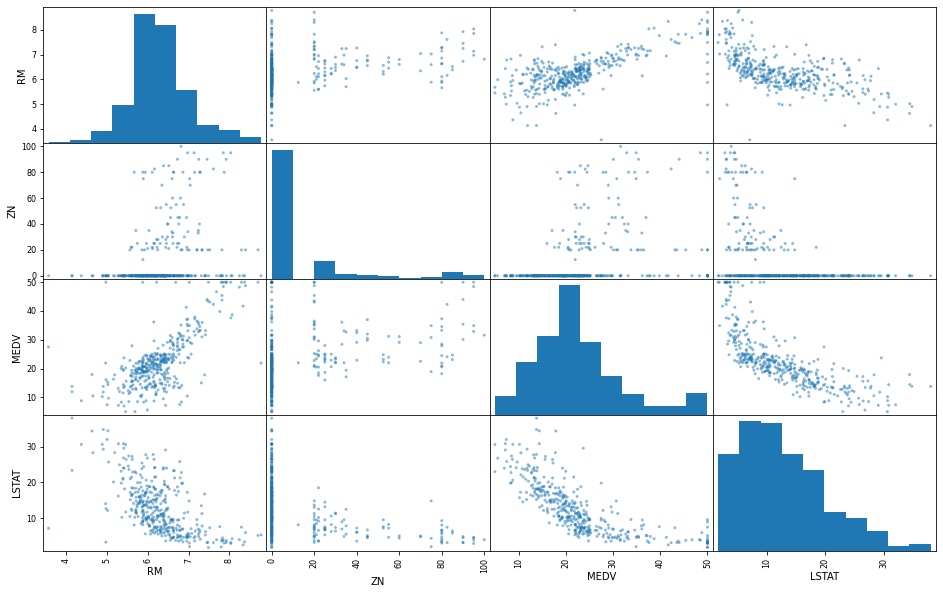

In [21]:
from pandas.plotting import scatter_matrix
attr=['RM' ,'ZN', 'MEDV','LSTAT']
scatter_matrix(hs[attr],figsize = (16,10)) 

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

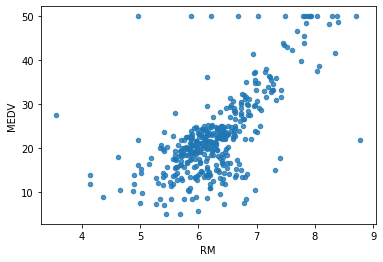

In [22]:
hs.plot(kind = 'scatter',y = 'MEDV',x='RM',alpha = 0.8)

## Atribute combination

In [23]:
hs['TPM'] = hs['LSTAT']/hs['RM']
hs['TPM']

160    1.679402
294    2.541725
485    1.466707
433    3.009194
439    2.778544
         ...   
55     1.657440
446    2.214659
246    0.703739
130    2.958422
280    1.128417
Name: TPM, Length: 392, dtype: float64

In [24]:
corr_matrix = hs.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV      1.000000
RM        0.682814
ZN        0.379508
B         0.332194
DIS       0.222780
CHAS      0.167655
AGE      -0.366325
RAD      -0.371031
CRIM     -0.379066
NOX      -0.404113
TAX      -0.449792
INDUS    -0.467670
PRATIO   -0.528444
TPM      -0.704341
LSTAT    -0.736497
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TPM', ylabel='MEDV'>

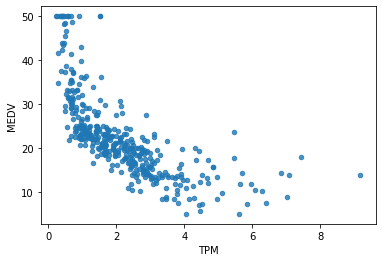

In [25]:
hs.plot(kind = 'scatter',y = 'MEDV',x='TPM',alpha = 0.8)

<AxesSubplot:xlabel='MEDV', ylabel='RM'>

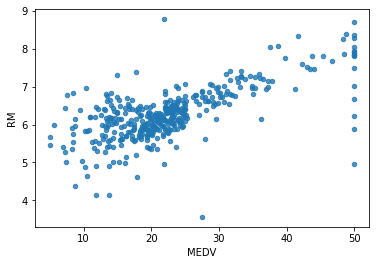

In [26]:
hs.plot(kind = 'scatter',x = 'MEDV',y='RM',alpha = 0.8)

In [27]:
hs.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [28]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 160 to 280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    392 non-null    float64
 1   ZN      392 non-null    float64
 2   INDUS   392 non-null    float64
 3   CHAS    392 non-null    int64  
 4   NOX     392 non-null    float64
 5   RM      391 non-null    float64
 6   AGE     392 non-null    float64
 7   DIS     392 non-null    float64
 8   RAD     392 non-null    int64  
 9   TAX     392 non-null    int64  
 10  PRATIO  392 non-null    float64
 11  B       392 non-null    float64
 12  LSTAT   392 non-null    float64
 13  MEDV    392 non-null    float64
 14  TPM     391 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 49.0 KB


In [29]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 160 to 280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    392 non-null    float64
 1   ZN      392 non-null    float64
 2   INDUS   392 non-null    float64
 3   CHAS    392 non-null    int64  
 4   NOX     392 non-null    float64
 5   RM      391 non-null    float64
 6   AGE     392 non-null    float64
 7   DIS     392 non-null    float64
 8   RAD     392 non-null    int64  
 9   TAX     392 non-null    int64  
 10  PRATIO  392 non-null    float64
 11  B       392 non-null    float64
 12  LSTAT   392 non-null    float64
 13  MEDV    392 non-null    float64
 14  TPM     391 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 49.0 KB


In [30]:
hs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [31]:
fg=hs.dropna()  #just checking for elimminating the null values

In [32]:
fg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [33]:
hs.shape
fg.shape

(391, 15)

In [34]:
hs.shape

(392, 15)

In [35]:
fg.shape

(391, 15)

In [36]:
column_less_hs = hs.dropna(subset = ["RM"]) #missing data points

In [37]:
column_less_hs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [38]:
hs


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [39]:
medin = hs["RM"].median()
medin                  #filling null elements with median value

6.216

In [40]:
hs['RM'].fillna(medin)

160    6.020
294    4.973
485    6.593
433    6.417
439    6.525
       ...  
55     5.961
446    6.317
246    8.398
130    5.628
280    6.549
Name: RM, Length: 392, dtype: float64

In [41]:
hs


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [42]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 160 to 280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    392 non-null    float64
 1   ZN      392 non-null    float64
 2   INDUS   392 non-null    float64
 3   CHAS    392 non-null    int64  
 4   NOX     392 non-null    float64
 5   RM      391 non-null    float64
 6   AGE     392 non-null    float64
 7   DIS     392 non-null    float64
 8   RAD     392 non-null    int64  
 9   TAX     392 non-null    int64  
 10  PRATIO  392 non-null    float64
 11  B       392 non-null    float64
 12  LSTAT   392 non-null    float64
 13  MEDV    392 non-null    float64
 14  TPM     391 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 49.0 KB


In [43]:
d = hs['RM'].fillna(medin)
dc = hs.drop('TPM',axis =1)

In [44]:
d

160    6.020
294    4.973
485    6.593
433    6.417
439    6.525
       ...  
55     5.961
446    6.317
246    8.398
130    5.628
280    6.549
Name: RM, Length: 392, dtype: float64

In [45]:
dc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6


In [46]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV,TPM
160,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,1.679402
294,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,2.541725
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1.466707
433,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,3.009194
439,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,2.778544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,1.657440
446,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,2.214659
246,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,0.703739
130,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,2.958422


In [47]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
count,98.000000,98.000000,98.000000,98.000000,98.000000,97.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,3.472476,12.086735,10.550816,0.071429,0.538898,6.277464,66.327551,4.004747,9.326531,403.153061,18.598980,363.181939,12.437245,22.116327
std,8.226882,22.659290,6.918617,0.258863,0.114193,0.706081,27.928859,2.305953,8.543130,170.255257,1.830131,86.112323,6.831358,8.216525
min,0.009060,0.000000,1.250000,0.000000,0.385000,3.863000,6.000000,1.386100,1.000000,188.000000,12.600000,2.520000,2.870000,6.300000
25%,0.082262,0.000000,5.145000,0.000000,0.439750,5.926000,42.500000,2.289500,4.000000,280.250000,17.450000,377.820000,7.752500,18.375000
50%,0.139950,0.000000,8.560000,0.000000,0.515000,6.163000,74.000000,3.222750,5.000000,330.000000,18.900000,392.735000,11.565000,21.000000
75%,2.150545,20.000000,18.100000,0.000000,0.594000,6.563000,89.950000,5.273250,8.000000,666.000000,20.200000,396.900000,15.272500,24.725000
max,51.135800,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000,50.000000


In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dc)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([3.30960e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.84000e+01, 3.07930e+00, 5.00000e+00, 3.49500e+02,
       1.91000e+01, 3.90925e+02, 1.13500e+01, 2.12000e+01])

In [50]:
x = imputer.transform(dc)
#y = imputer.transform(strat_test_set)


In [51]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy="median")
imputer1.fit(strat_test_set)

SimpleImputer(strategy='median')

In [52]:
imputer1.statistics_

array([1.39950e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.15000e-01,
       6.16300e+00, 7.40000e+01, 3.22275e+00, 5.00000e+00, 3.30000e+02,
       1.89000e+01, 3.92735e+02, 1.15650e+01, 2.10000e+01])

In [53]:
y = imputer.transform(strat_test_set)

In [54]:
 hsnew = pd.DataFrame(x,columns = dc.columns)
 hslab = pd.DataFrame(y,columns = dc.columns)

In [55]:
hsnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    392 non-null    float64
 1   ZN      392 non-null    float64
 2   INDUS   392 non-null    float64
 3   CHAS    392 non-null    float64
 4   NOX     392 non-null    float64
 5   RM      392 non-null    float64
 6   AGE     392 non-null    float64
 7   DIS     392 non-null    float64
 8   RAD     392 non-null    float64
 9   TAX     392 non-null    float64
 10  PRATIO  392 non-null    float64
 11  B       392 non-null    float64
 12  LSTAT   392 non-null    float64
 13  MEDV    392 non-null    float64
dtypes: float64(14)
memory usage: 43.0 KB


In [56]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 160 to 280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    392 non-null    float64
 1   ZN      392 non-null    float64
 2   INDUS   392 non-null    float64
 3   CHAS    392 non-null    int64  
 4   NOX     392 non-null    float64
 5   RM      391 non-null    float64
 6   AGE     392 non-null    float64
 7   DIS     392 non-null    float64
 8   RAD     392 non-null    int64  
 9   TAX     392 non-null    int64  
 10  PRATIO  392 non-null    float64
 11  B       392 non-null    float64
 12  LSTAT   392 non-null    float64
 13  MEDV    392 non-null    float64
 14  TPM     391 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 49.0 KB


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [58]:
hs_num_tr = pipe.fit_transform(hsnew)

In [59]:
hs_num_tr

array([[-0.4207046 , -0.47622652, -1.07833188, ...,  0.42198422,
        -0.36647395,  0.06474646],
       [-0.13035564, -0.47622652, -0.22889174, ..., -0.0333135 ,
        -0.0155512 , -0.68143304],
       [-0.42156368, -0.47622652,  0.06587125, ...,  0.40878718,
        -0.427504  , -0.0193301 ],
       ...,
       [-0.36978041,  0.3609071 , -1.08994816, ...,  0.35418977,
        -0.94903347,  2.75519648],
       [-0.18473311, -0.47622652,  1.17667758, ..., -1.96157064,
         0.54065443, -0.73398089],
       [-0.42257216, -0.47622652,  0.3548261 , ...,  0.41793996,
        -0.74375059,  0.47461971]])

In [60]:
hs_Standard = pd.DataFrame(hs_num_tr,columns = dc.columns)

In [61]:
hs_Standard

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,-0.420705,-0.476227,-1.078332,-0.27735,-0.429504,-0.373841,-0.770484,-0.057342,-0.547575,-0.700102,-0.840633,0.421984,-0.366474,0.064746
1,-0.130356,-0.476227,-0.228892,-0.27735,-0.140562,-1.847858,-1.100912,-0.560963,-0.660727,-0.652869,-0.030539,-0.033314,-0.015551,-0.681433
2,-0.421564,-0.476227,0.065871,-0.27735,0.105888,0.432856,-0.000655,-0.580807,-1.000184,-0.835896,1.139596,0.408787,-0.427504,-0.019330
3,0.423179,-0.476227,0.961776,-0.27735,1.295650,0.185075,1.025784,-0.723601,1.602315,1.484412,0.779554,-0.525435,0.909609,-1.007230
4,0.109245,-0.476227,0.961776,-0.27735,1.295650,0.337122,0.610990,-0.601623,1.602315,1.484412,0.779554,-3.221143,0.745937,-0.891624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.410683,-0.476227,-0.096757,-0.27735,-1.253840,-0.456904,-1.814498,0.785221,-0.660727,-0.646965,0.329502,0.248613,-0.398376,-0.092897
388,0.324585,-0.476227,0.961776,-0.27735,1.295650,0.044290,0.487958,-0.456397,1.602315,1.484412,0.779554,0.461043,0.171700,-0.324108
389,-0.369780,0.360907,-1.089948,-0.27735,0.734763,2.974021,0.786750,-0.673263,-0.547575,-0.889033,-2.460820,0.354190,-0.949033,2.755196
390,-0.184733,-0.476227,1.176678,-0.27735,2.638382,-0.925718,1.085542,-1.048681,-0.547575,-0.068364,-1.695732,-1.961571,0.540654,-0.733981


In [62]:
train_feature = hsnew.drop('MEDV',axis = 1)
train_label = hsnew['MEDV'].copy()
test_feature = hslab.drop('MEDV',axis = 1)
test_label = hslab['MEDV'].copy()

In [63]:
train_feature.shape


(392, 13)

In [64]:
train_label.shape

(392,)

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor()
model.fit(train_feature,train_label)

RandomForestRegressor()

In [73]:
y_pred = model.predict(test_feature)

In [78]:
y_pred = list(y_pred)

In [79]:
y_pred

[29.354999999999986,
 13.256000000000004,
 23.982000000000003,
 18.788999999999994,
 43.395999999999965,
 24.79,
 10.375999999999998,
 19.155000000000015,
 35.36199999999997,
 17.728999999999992,
 21.708,
 19.319000000000003,
 23.054999999999996,
 25.674999999999997,
 33.25200000000001,
 24.329999999999995,
 18.692000000000004,
 45.63000000000001,
 12.36999999999999,
 31.477999999999994,
 31.367000000000004,
 20.210000000000015,
 20.397000000000002,
 9.716000000000001,
 33.56399999999997,
 14.800999999999993,
 19.754999999999992,
 31.478000000000005,
 22.74999999999999,
 21.61,
 28.598999999999997,
 20.85899999999999,
 25.805999999999994,
 21.074999999999992,
 13.936000000000003,
 18.062,
 21.249999999999996,
 15.239999999999998,
 20.527000000000008,
 23.666000000000007,
 20.02599999999999,
 29.13500000000002,
 7.750000000000001,
 43.44900000000001,
 41.891000000000005,
 19.474999999999994,
 7.963000000000002,
 21.377999999999993,
 24.65699999999999,
 19.806999999999984,
 14.4649999999

In [80]:
test_label = list(test_label)

In [82]:
test_label

[24.8,
 13.4,
 24.4,
 17.4,
 44.8,
 28.7,
 6.3,
 23.1,
 33.4,
 20.5,
 20.6,
 23.1,
 21.6,
 23.5,
 33.0,
 24.4,
 20.4,
 46.0,
 10.9,
 32.2,
 33.1,
 19.6,
 23.1,
 8.4,
 31.5,
 17.8,
 20.4,
 32.0,
 20.1,
 20.3,
 26.6,
 21.4,
 24.1,
 21.2,
 19.1,
 18.3,
 11.9,
 15.2,
 21.7,
 24.2,
 20.1,
 15.0,
 7.0,
 42.8,
 35.2,
 19.4,
 10.4,
 20.9,
 23.7,
 19.3,
 14.6,
 21.0,
 21.0,
 19.9,
 17.1,
 22.6,
 19.4,
 24.5,
 28.6,
 17.2,
 25.0,
 21.4,
 23.7,
 15.1,
 50.0,
 21.0,
 20.6,
 17.5,
 8.1,
 30.1,
 12.5,
 12.7,
 22.6,
 36.4,
 13.1,
 32.5,
 19.7,
 30.3,
 21.7,
 34.9,
 10.2,
 17.8,
 19.1,
 28.2,
 26.4,
 9.6,
 7.2,
 19.5,
 21.5,
 20.0,
 26.4,
 26.7,
 20.1,
 19.6,
 19.1,
 22.2,
 18.6,
 24.1]

In [86]:
from  sklearn.metrics import accuracy_score
r2_score(test_label,y_pred)

0.8799747799761344